In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
%matplotlib inline

In [4]:
# Reading the CSV file
customer_data = pd.read_csv("churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_data.drop(columns = ["customerID"], inplace = True)
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Converting churn into a dummy variable column
dummy_churn = pd.get_dummies(customer_data["Churn"], dtype = int, drop_first= True)
concat_df = pd.concat([customer_data, dummy_churn], axis = "columns")
concat_df.drop(columns = ["Churn"], inplace = True)
data = concat_df
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Yes
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [7]:
data.rename(columns = {"Yes": "Churn"}, inplace= True) # Renaming the Yes Column
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [8]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
customer_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
customer_data.duplicated().sum()

np.int64(22)

In [11]:
customer_data.drop_duplicates(inplace = True)
customer_data.shape

(7021, 20)

In [12]:
customer_data.duplicated().sum()

np.int64(0)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370
std,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [15]:
data.duplicated().sum()

np.int64(22)

In [16]:
data.drop_duplicates(inplace = True)
data.shape

(7021, 20)

In [17]:
data.duplicated().sum()

np.int64(0)

In [18]:
data["PaymentMethod"].value_counts()

PaymentMethod
Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [19]:
data["InternetService"].value_counts()

InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64

In [20]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
data["Churn"].value_counts()

Churn
0    5164
1    1857
Name: count, dtype: int64

In [22]:
1853/5156

0.35938712179984483

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train = data.drop(columns= ["Churn"])
y_train = data["Churn"]

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [26]:
categorical_cols = X_train.select_dtypes(include= ["object"]).columns.tolist()
numerical_cols = X_train.select_dtypes(include= ["int64", "float64"]).columns.tolist()

In [27]:
categorical_transformers = OneHotEncoder(drop = "first", handle_unknown= "ignore")
numerical_transformers = StandardScaler()

preprocessor= ColumnTransformer(
    transformers= [
        ("categorical_cols", categorical_transformers, categorical_cols),
        ("numerical_cols", numerical_transformers, numerical_cols)
    ]
)
preprocessor

,transformers,"[('categorical_cols', ...), ('numerical_cols', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [28]:
train_X, test_X, train_y, test_y = train_test_split(X_train, y_train, test_size = .3, stratify = y_train, random_state= 42)
train_X.shape

(4914, 19)

In [29]:
test_X.shape

(2107, 19)

In [30]:
train_X.select_dtypes(include = ["object"]).columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [31]:
test_X.select_dtypes(include = ["object"]).columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [32]:
train_y.value_counts()

Churn
0    3614
1    1300
Name: count, dtype: int64

In [33]:
churn = train_y.value_counts()[0]
no_churn = train_y.value_counts()[1]

total = churn + no_churn

pct_churn = churn / total * 100
pct_no_churn =  no_churn / total * 100 

print("The percentage of churn in the target training datasets is: {:.2f}%".format(pct_churn))
print("The Percentage of no churn in the target training datasets is: {:.2f}%".format(pct_no_churn))

The percentage of churn in the target training datasets is: 73.54%
The Percentage of no churn in the target training datasets is: 26.46%


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [35]:
log_model = LogisticRegression()
rfc_model = RandomForestClassifier()
xgb_model = xgb.XGBClassifier()

In [36]:
import warnings

warnings.filterwarnings(
    "ignore",
    category=UserWarning, 
    message="Found unknown categories in columns"
)

In [37]:
from sklearn.pipeline import make_pipeline

In [38]:
log_pipeline = make_pipeline(preprocessor, log_model)
rfc_pipeline = make_pipeline(preprocessor, rfc_model)
xgb_pipeline = make_pipeline(preprocessor, xgb_model)

xgb_pipeline

,steps,"[('columntransformer', ...), ('xgbclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('categorical_cols', ...), ('numerical_cols', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [39]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [40]:
# Cross-Validation Using StratifiedKFold
log_train_scores = []
rfc_train_scores = []
xgb_train_scores = []

# Defining function to calculate the accuracy of each models
def get_score(model, X, y):
    model.fit(X, y)
    return model.score(X, y)

skf = StratifiedKFold(n_splits= 7)
split_data =skf.split(X_train, y_train)

# Looping through the datasets
for train_index, test_index in split_data:
    train_X_fold, test_X_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    train_y_fold, test_y_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    log_train_scores.append(get_score(log_pipeline, train_X_fold, train_y_fold))
    rfc_train_scores.append(get_score(rfc_pipeline, train_X_fold, train_y_fold))
    xgb_train_scores.append(get_score(xgb_pipeline, train_X_fold, train_y_fold))

print(log_train_scores)
print(rfc_train_scores)
print(xgb_train_scores)

[0.8762047191758059, 0.8765370555001661, 0.8767032236623463, 0.8780325689597873, 0.8745430375540046, 0.8777002326354271, 0.8803589232303091]
[0.9981721502160186, 0.9975074775672981, 0.9975074775672981, 0.9978398138916583, 0.9981721502160186, 0.9980059820538385, 0.9971751412429378]
[0.9240611498836823, 0.9247258225324028, 0.9217347956131605, 0.923728813559322, 0.9283815221003656, 0.9177467597208375, 0.92107012296444]


In [41]:
# Calculating the average train score for each estimators
mean_train_score_log = np.mean(log_train_scores)
mean_train_score_rfc = np.mean(rfc_train_scores)
mean_train_score_xgb = np.mean(xgb_train_scores)

print("Mean Train Score for Logistic Regression: {:.2f}%".format(mean_train_score_log * 100))
print("Mean Train Score for RandomForest Classifier: {:.2f}%".format(mean_train_score_rfc * 100))
print("Mean Train Score for XGBoost Classifier: {:.2f}%".format(mean_train_score_xgb * 100))

Mean Train Score for Logistic Regression: 87.72%
Mean Train Score for RandomForest Classifier: 99.78%
Mean Train Score for XGBoost Classifier: 92.31%


In [42]:
log_test_scores = []
rfc_test_scores = []
xgb_test_scores = []

def get_score(model, X, y):
    model.fit(X, y)
    return model.score(X, y)

skf = StratifiedKFold(n_splits= 7)
split_data =skf.split(X_train, y_train)

for train_index, test_index in split_data:
    train_X_fold, test_X_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    train_y_fold, test_y_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    log_test_scores.append(get_score(log_pipeline, test_X_fold, test_y_fold))
    rfc_test_scores.append(get_score(rfc_pipeline, test_X_fold, test_y_fold))
    xgb_test_scores.append(get_score(xgb_pipeline, test_X_fold, test_y_fold))

print(log_test_scores)
print(rfc_test_scores)
print(xgb_test_scores)

[0.8763708873379861, 0.8823529411764706, 0.8873379860418744, 0.8783649052841476, 0.8853439680957128, 0.8823529411764706, 0.8823529411764706]
[1.0, 1.0, 1.0, 1.0, 0.9990029910269193, 0.9980059820538385, 1.0]
[0.996011964107677, 1.0, 0.9980059820538385, 0.9970089730807578, 0.9970089730807578, 0.9970089730807578, 0.9990029910269193]


In [43]:
# Calculating the average test score for each estimators
mean_test_score_log = np.mean(log_test_scores)
mean_test_score_rfc = np.mean(rfc_test_scores)
mean_test_score_xgb = np.mean(xgb_test_scores)

print("Mean Test Score for Logistic Regression: {:.2f}%".format(mean_test_score_log * 100))
print("Mean Test Score for RandomForest Classifier: {:.2f}%".format(mean_test_score_rfc * 100))
print("Mean Test Score for XGBoost Classifier: {:.2f}%".format(mean_test_score_xgb * 100))

Mean Test Score for Logistic Regression: 88.21%
Mean Test Score for RandomForest Classifier: 99.96%
Mean Test Score for XGBoost Classifier: 99.77%


In [44]:
log_cv_score = cross_val_score(log_pipeline, X_train, y_train, cv=7, verbose=True)
rfc_cv_score = cross_val_score(rfc_pipeline, X_train, y_train, cv=7, verbose=True)
xgb_cv_score = cross_val_score(xgb_pipeline, X_train, y_train, cv=7, verbose=True)

print(f"Cross Validation Score for Logistic Regressioin is: {log_cv_score}")
print(f"Cross Validation Score for RandomForest Classifier is: {rfc_cv_score}")
print(f"Cross Validation Score for XGB Classifier is: {xgb_cv_score}")

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.3min finished


Cross Validation Score for Logistic Regressioin is: [0.80059821 0.81655035 0.80757727 0.78664008 0.81256231 0.79561316
 0.80957129]
Cross Validation Score for RandomForest Classifier is: [0.79561316 0.79262213 0.79461615 0.77467597 0.80857428 0.79062812
 0.80558325]
Cross Validation Score for XGB Classifier is: [0.777667   0.78165503 0.77068794 0.75872383 0.79262213 0.78763709
 0.79561316]


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.2s finished


In [45]:
print(f"Mean Train Cval Score for Logistic Regression is: {np.mean(log_cv_score)*100:.2f}%")
print(f"Mean Train Cval Score for RandomForest Classifier Regression is: {np.mean(rfc_cv_score)*100:.2f}%")
print(f"Mean Train Cval Score for Xgb Classifier is: {np.mean(xgb_cv_score)*100:.2f}%")

Mean Train Cval Score for Logistic Regression is: 80.42%
Mean Train Cval Score for RandomForest Classifier Regression is: 79.46%
Mean Train Cval Score for Xgb Classifier is: 78.07%


In [46]:
y_pred = xgb_pipeline.predict(test_X)
y_pred

array([0, 0, 0, ..., 1, 1, 0], shape=(2107,))

In [47]:
xgb_pipeline.score(test_X, test_y)

0.8035121025154248

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

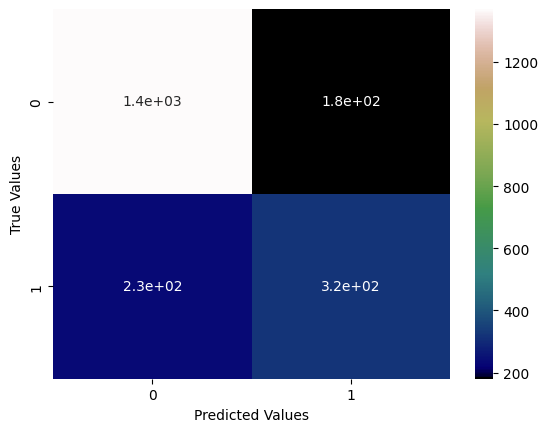

In [49]:
cm = confusion_matrix(test_y, y_pred)

sns.heatmap(cm, annot= True, cmap = "gist_earth")
plt.xlabel("Predicted Values")
plt.ylabel("True Values");

In [50]:
report = classification_report(test_y, y_pred, output_dict= True)
report_df = pd.DataFrame(report).round(2)
report_df

,0,1,accuracy,macro avg,weighted avg
precision,0.85,0.64,0.8,0.75,0.8
recall,0.88,0.58,0.8,0.73,0.8
f1-score,0.87,0.61,0.8,0.74,0.8
support,1550.00,557.00,0.8,2107.00,2107.0


In [51]:
# HyperParameter Tuning 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
param_grid = {
    "xgbclassifier__n_estimators": [10, 100, 1000],
    "xgbclassifier__max_depth": [5, 10, 20],
    "xgbclassifier__learning_rate": [0.1, 0.01, 0.001]
}
clf = GridSearchCV(xgb_pipeline, param_grid)
clf.fit(train_X, train_y)
clf.cv_results_ 

In [84]:
param_grid = {
    "xgbclassifier__n_estimators": [10, 100, 1000],
    "xgbclassifier__max_depth": [5, 10, 20],
    "xgbclassifier__learning_rate": [.1, .01, .001]
}
clf1 = RandomizedSearchCV(xgb_pipeline, param_grid, n_iter= 2)
clf1.fit(train_X, train_y)

pd.DataFrame(clf1.cv_results_)[["params", "mean_test_score"]]

,params,mean_test_score
0,"{'xgbclassifier__n_estimators': 100, 'xgbclass...",0.778384
1,"{'xgbclassifier__n_estimators': 1000, 'xgbclas...",0.771058


In [52]:
# Receiver Operational Characteristic Curve (ROC Curve)
from sklearn.metrics import roc_curve, auc

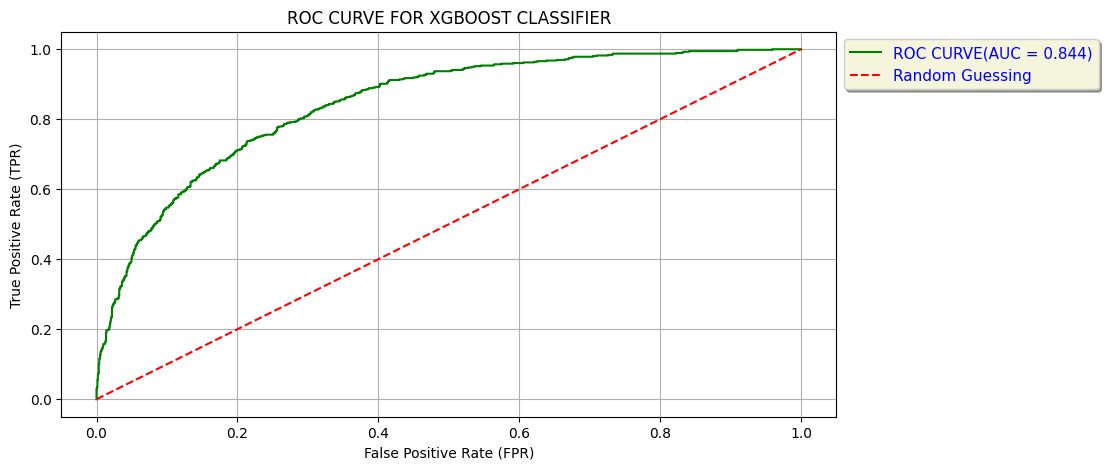

In [173]:
y_pred_proba = xgb_pipeline.predict_proba(test_X)[:, 1]

fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(fpr, tpr, color= "green", label = f"ROC CURVE(AUC = {roc_auc:.3f})")
ax.plot([0, 1], [0, 1], color = "red", ls = "--", label = "Random Guessing")
ax.set_title("ROC CURVE FOR XGBOOST CLASSIFIER")
ax.set_xlabel("False Positive Rate (FPR)")
ax.set_ylabel("True Positive Rate (TPR)")
ax.grid()
ax.legend(
    bbox_to_anchor = (1, 1),
    labelcolor = "blue", 
    shadow = True, 
    facecolor= "beige", 
    fontsize = 11
);

In [99]:
from sklearn.metrics import precision_recall_curve, average_precision_score

Average precision score is: 0.67


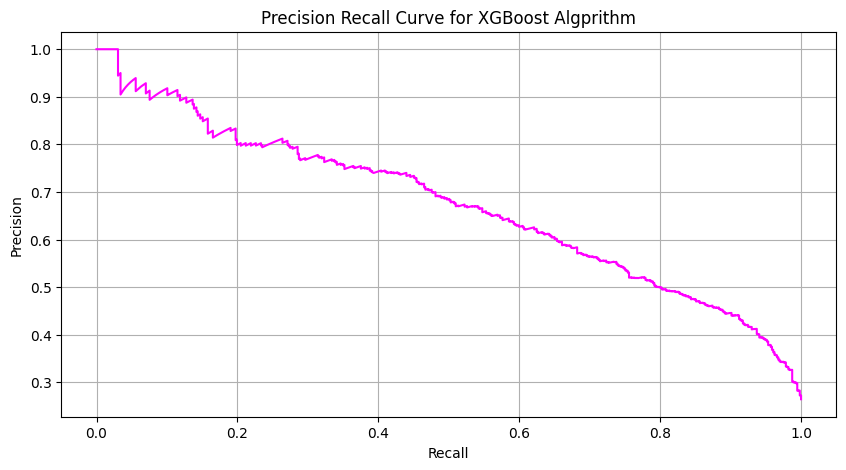

In [196]:
precision, recall, thresholds = precision_recall_curve(test_y, y_pred_proba)
avg_prec_score = average_precision_score(test_y, y_pred_proba)

plt.figure(figsize = (10, 5))
plt.plot(recall, precision, color = "magenta")
plt.title("Precision Recall Curve for XGBoost Algprithm")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()

print("Average precision score is: {:.2f}".format(avg_prec_score))

In [133]:
rfc_y_pred = rfc_pipeline.predict(test_X)
rfc_y_pred 

array([0, 0, 0, ..., 1, 0, 0], shape=(2107,))

In [118]:
rfc_pipeline.score(test_X, test_y)

0.8262933080208827

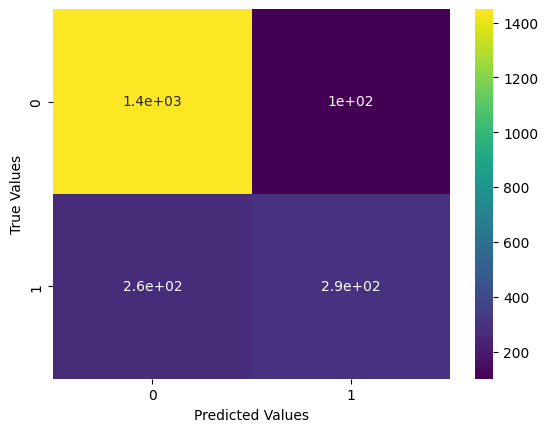

In [138]:
cm1 = confusion_matrix(test_y, rfc_y_pred)
sns.heatmap(cm1, annot = True, cmap= "viridis")
plt.xlabel("Predicted Values")
plt.ylabel("True Values");

In [144]:
rfc_report = classification_report(test_y, rfc_y_pred, output_dict = True)
pd.DataFrame(rfc_report).round(2)

,0,1,accuracy,macro avg,weighted avg
precision,0.85,0.74,0.83,0.79,0.82
recall,0.93,0.52,0.83,0.73,0.83
f1-score,0.89,0.61,0.83,0.75,0.82
support,1550.00,557.00,0.83,2107.00,2107.00


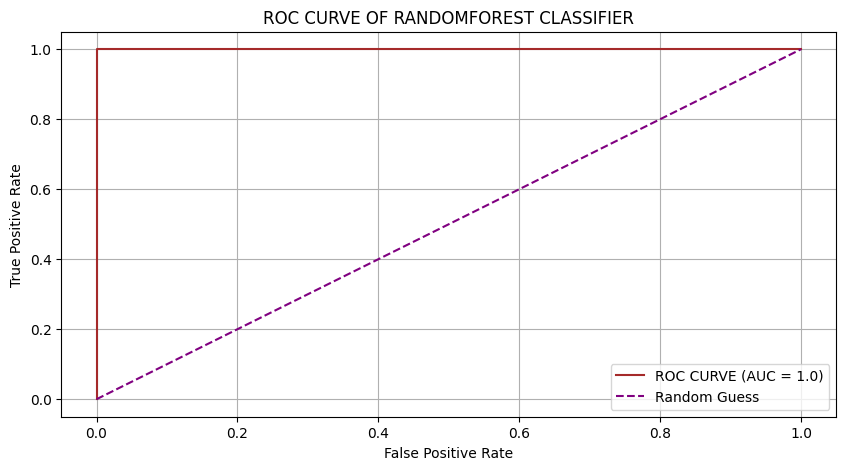

In [178]:
rfc_y_pred_proba = rfc_pipeline.predict_proba(test_X)[:, 1]

fpr, tpr, thresholds = roc_curve(rfc_y_pred, rfc_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10, 5))

plt.plot(fpr, tpr, color = "brown", label = "ROC CURVE (AUC = {})".format(roc_auc))
plt.plot([0,1], [0,1], ls = "--", color = "purple", label= "Random Guess")
plt.title("ROC CURVE OF RANDOMFOREST CLASSIFIER")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

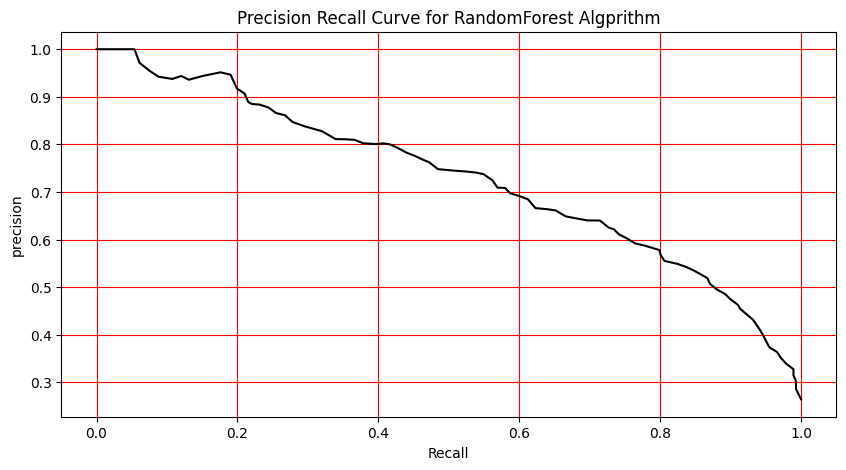

In [201]:
precision, recall, thresholds = precision_recall_curve(test_y, rfc_y_pred_proba)

plt.figure(figsize = (10, 5))
plt.plot(recall, precision, color = 'black')
plt.title("Precision Recall Curve for RandomForest Algprithm")
plt.xlabel("Recall")
plt.ylabel("precision")
plt.grid(color = "red");

In [187]:
rfc_avg_prec_score = average_precision_score(test_y, rfc_y_pred_proba)
print(f"Average precision score for RandomForest Classifier is: {rfc_avg_prec_score:.2f}")

Average precision score for RandomForest Classifier is: 0.73


In [204]:
log_y_pred = log_pipeline.predict(test_X)
log_y_pred

array([0, 0, 0, ..., 1, 0, 0], shape=(2107,))

In [206]:
log_pipeline.score(test_X, test_y)

0.81015662078785

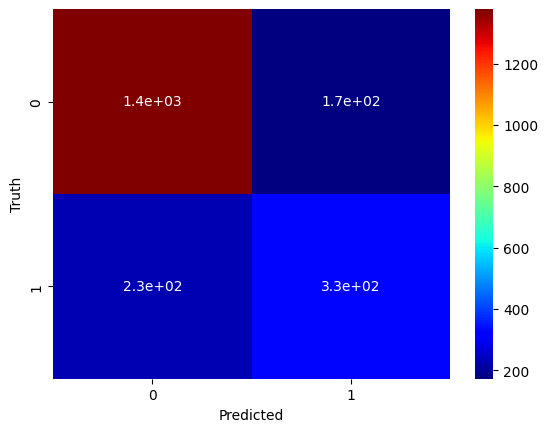

In [213]:
cm2 = confusion_matrix(test_y, log_y_pred)

sns.heatmap(cm2, annot = True, cmap = "jet")
plt.xlabel("Predicted")
plt.ylabel("Truth");

In [219]:
log_pred = classification_report(test_y, log_y_pred, output_dict= True)
pd.DataFrame(log_pred).round(2)

,0,1,accuracy,macro avg,weighted avg
precision,0.86,0.66,0.81,0.76,0.80
recall,0.89,0.59,0.81,0.74,0.81
f1-score,0.87,0.62,0.81,0.75,0.81
support,1550.00,557.00,0.81,2107.00,2107.00


In [223]:
log_pred_proba = log_pipeline.predict_proba(test_X)[:, 1]
log_pred_proba

array([0.12572032, 0.03299075, 0.05302344, ..., 0.57933044, 0.10439933,
       0.06666729], shape=(2107,))

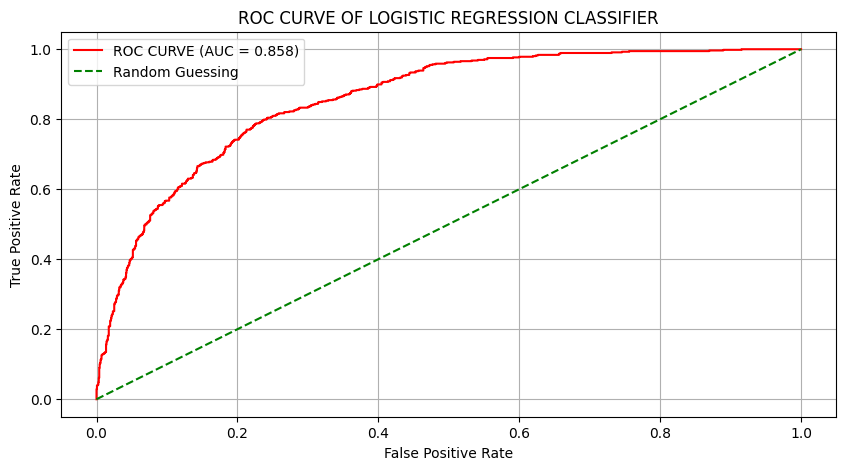

In [268]:
fpr, tpr, thresholds = roc_curve(test_y, log_pred_proba)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(fpr, tpr, color = "red", label = f"ROC CURVE (AUC = {roc_auc:.3f})")
ax.plot([0, 1], [0, 1], color = "green", ls = "--", label = "Random Guessing")
ax.set_title("ROC CURVE OF LOGISTIC REGRESSION CLASSIFIER")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()
ax.grid();

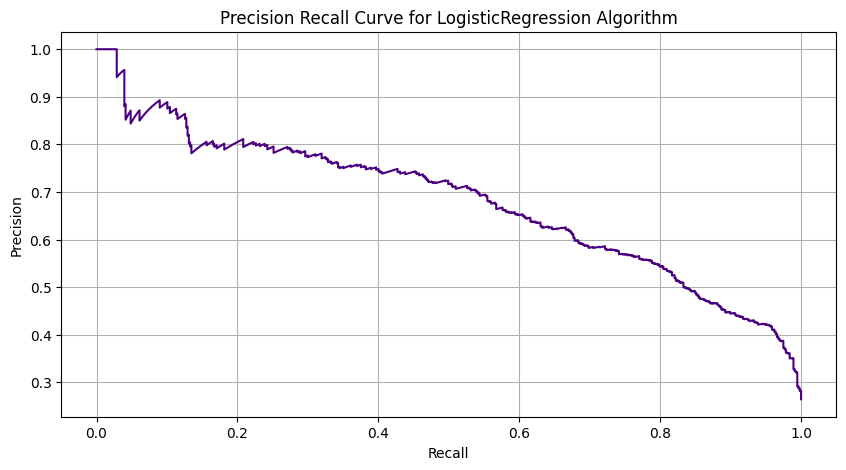

In [264]:
precision, recall, thresholds = precision_recall_curve(test_y, log_pred_proba)

plt.figure(figsize = (10, 5))
plt.plot(recall, precision, color = "indigo")
plt.title("Precision Recall Curve for LogisticRegression Algorithm")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid();

In [275]:
print(f"Average precision score for Logistic Regression:{average_precision_score(test_y,  log_pred_proba):.2f}")

Average precision score for Logistic Regression:0.68
